In [1]:
# import libarieries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# EDA

In [2]:
# Read the data
df = pd.read_csv('loan_prediction.csv')
display(df.head())
print(df.shape)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


(614, 13)


In [3]:
# Check the missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
# Filli missing values
df['Gender'] = df['Gender'].fillna(
df['Gender'].dropna().mode().values[0] )
df['Married'] = df['Married'].fillna(
df['Married'].dropna().mode().values[0] )
df['Dependents'] = df['Dependents'].fillna(
df['Dependents'].dropna().mode().values[0] )
df['Self_Employed'] = df['Self_Employed'].fillna(
df['Self_Employed'].dropna().mode().values[0] )
df['LoanAmount'] = df['LoanAmount'].fillna(
df['LoanAmount'].dropna().median() )
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(
df['Loan_Amount_Term'].dropna().mode().values[0] )
df['Credit_History'] = df['Credit_History'].fillna(
df['Credit_History'].dropna().mode().values[0] )

In [5]:
# Check again the missing values
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

'''
No missing values in dataset.
''' 

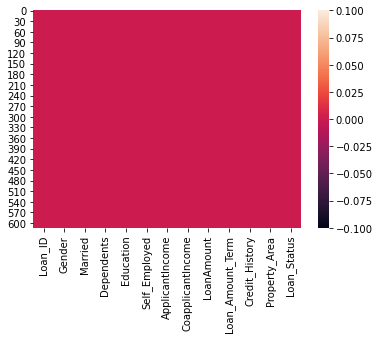

In [6]:
# Check the visualization
sns.heatmap(df.isnull())

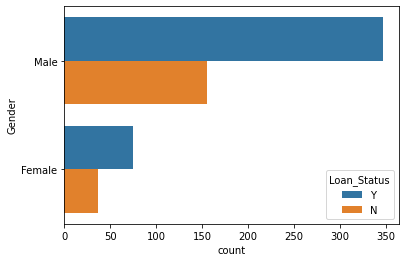

In [7]:
# Check the gender vs loan status
sns.countplot(y='Gender',hue='Loan_Status',data=df)

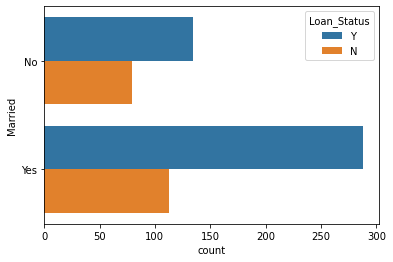

In [8]:
# Check the Married vs loan status
sns.countplot(y='Married',hue='Loan_Status',data=df)

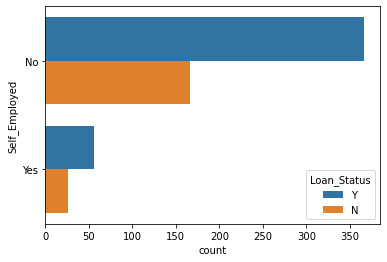

In [9]:
# Check the SelfEmployed vs loan status
sns.countplot(y='Self_Employed',hue='Loan_Status',data=df)

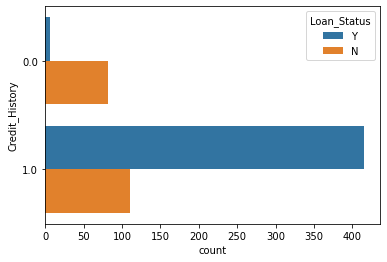

In [10]:
# Check the Credit_history vs loan status 
sns.countplot(y='Credit_History',hue='Loan_Status',data=df)

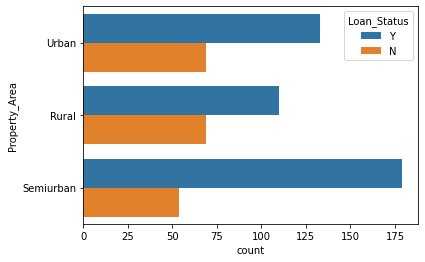

In [11]:
# Check the PropertyArea vs loan status 
sns.countplot(y='Property_Area',hue='Loan_Status',data=df)

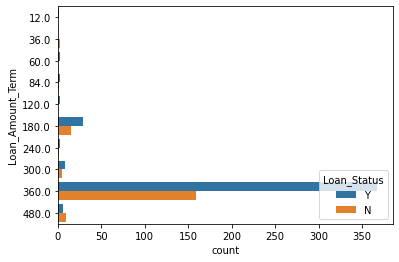

In [12]:
# Check the LoanAmountTerm vs Loanstatus
sns.countplot(y='Loan_Amount_Term',hue='Loan_Status',data=df)

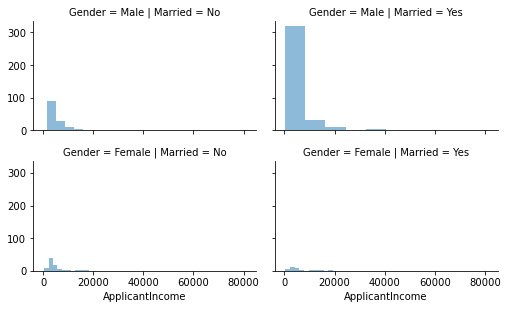

In [13]:
grid = sns.FacetGrid(df,row='Gender',col='Married',size=2.2,aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=.5,bins=10)
grid.add_legend()

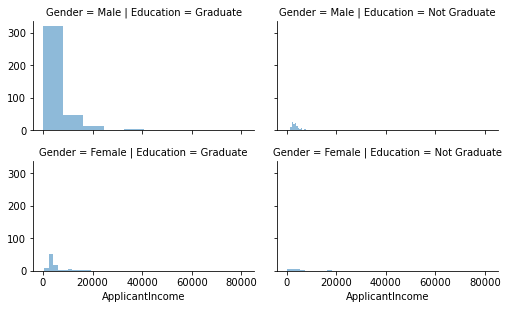

In [14]:
# Check the gender vs education
grid = sns.FacetGrid(df,row='Gender',col='Education',size=2.2,aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=.5,bins=10)
grid.add_legend()

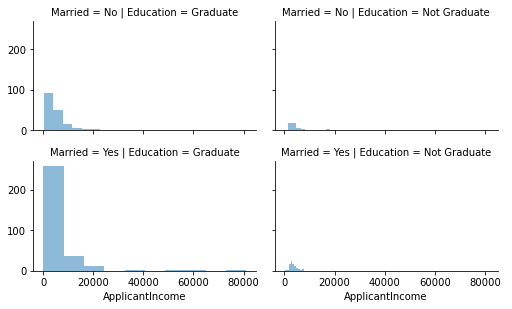

In [15]:
grid = sns.FacetGrid(df,row='Married',col='Education',size=2.2,aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=.5,bins=10)
grid.add_legend()

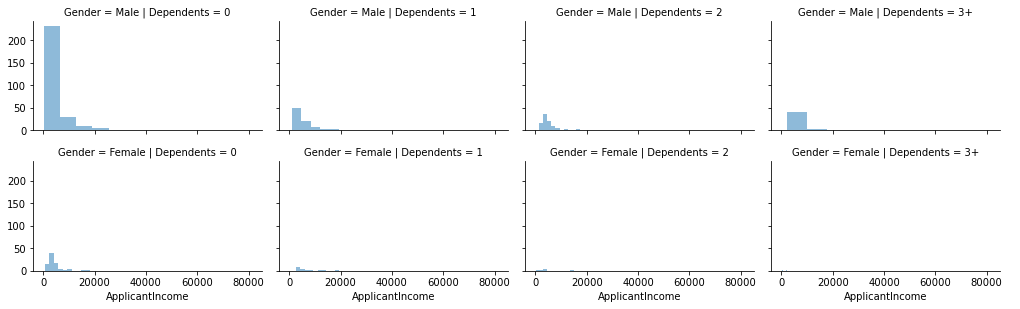

In [16]:
grid = sns.FacetGrid(df,row='Gender',col='Dependents',size=2.2,aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=.5,bins=10)
grid.add_legend()

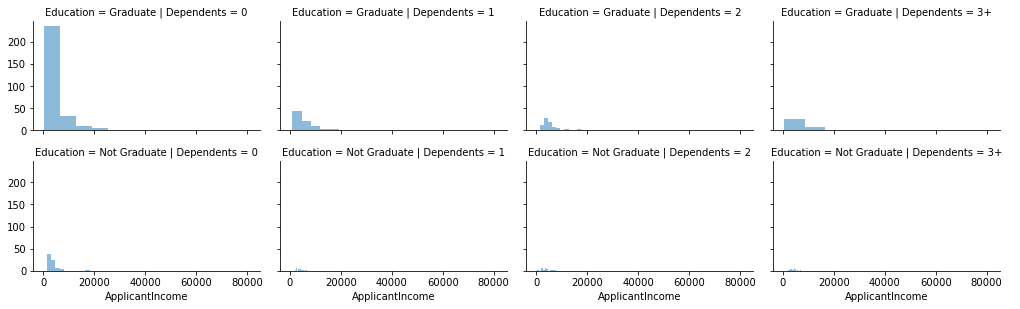

In [17]:
grid = sns.FacetGrid(df,row='Education',col='Dependents',size=2.2,aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=.5,bins=10)
grid.add_legend()

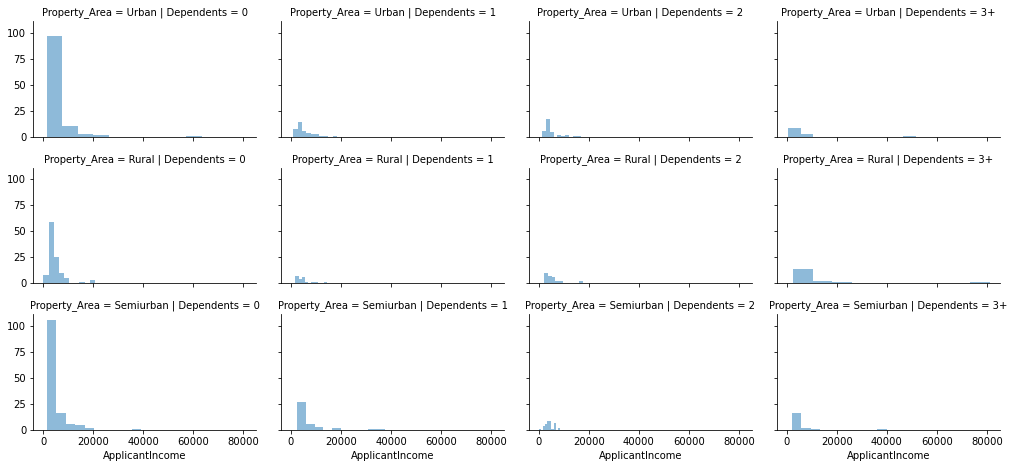

In [18]:
grid = sns.FacetGrid(df,row='Property_Area',col='Dependents',size=2.2,aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=.5,bins=10)
grid.add_legend()

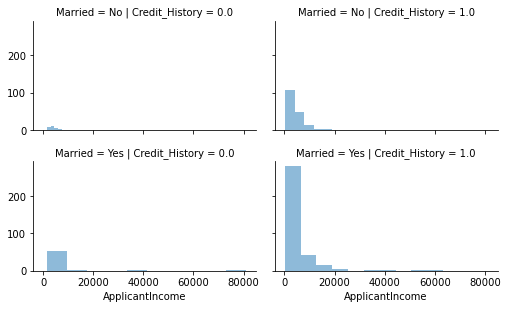

In [19]:
grid = sns.FacetGrid(df,row='Married',col='Credit_History',size=2.2,aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=.5,bins=10)
grid.add_legend()

In [20]:
# Encoding to numeric data; getting ready for training
code_numeric = {'Male': 1, 'Female': 2,'Yes': 1, 'No': 2,'Graduate': 1, 'Not Graduate': 2,'Urban': 3, 'Semiurban': 2,'Rural': 1,'Y': 1, 'N': 0,'3+': 3}
df = df.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)
#drop the uniques loan id
df.drop('Loan_ID', axis = 1, inplace = True)

In [21]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,2,0,1,2,5849,0.0,128.0,360.0,1.0,3,1
1,1,1,1,1,2,4583,1508.0,128.0,360.0,1.0,1,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,3,1
3,1,1,0,2,2,2583,2358.0,120.0,360.0,1.0,3,1
4,1,2,0,1,2,6000,0.0,141.0,360.0,1.0,3,1


In [22]:
df['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [23]:
# Check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 57.7+ KB


In [24]:
Dependents_ = pd.to_numeric(df.Dependents)
df.drop(['Dependents'], axis = 1, inplace = True)
df = pd.concat([df, Dependents_], axis = 1)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Education          614 non-null    int64  
 3   Self_Employed      614 non-null    int64  
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      614 non-null    int64  
 10  Loan_Status        614 non-null    int64  
 11  Dependents         614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


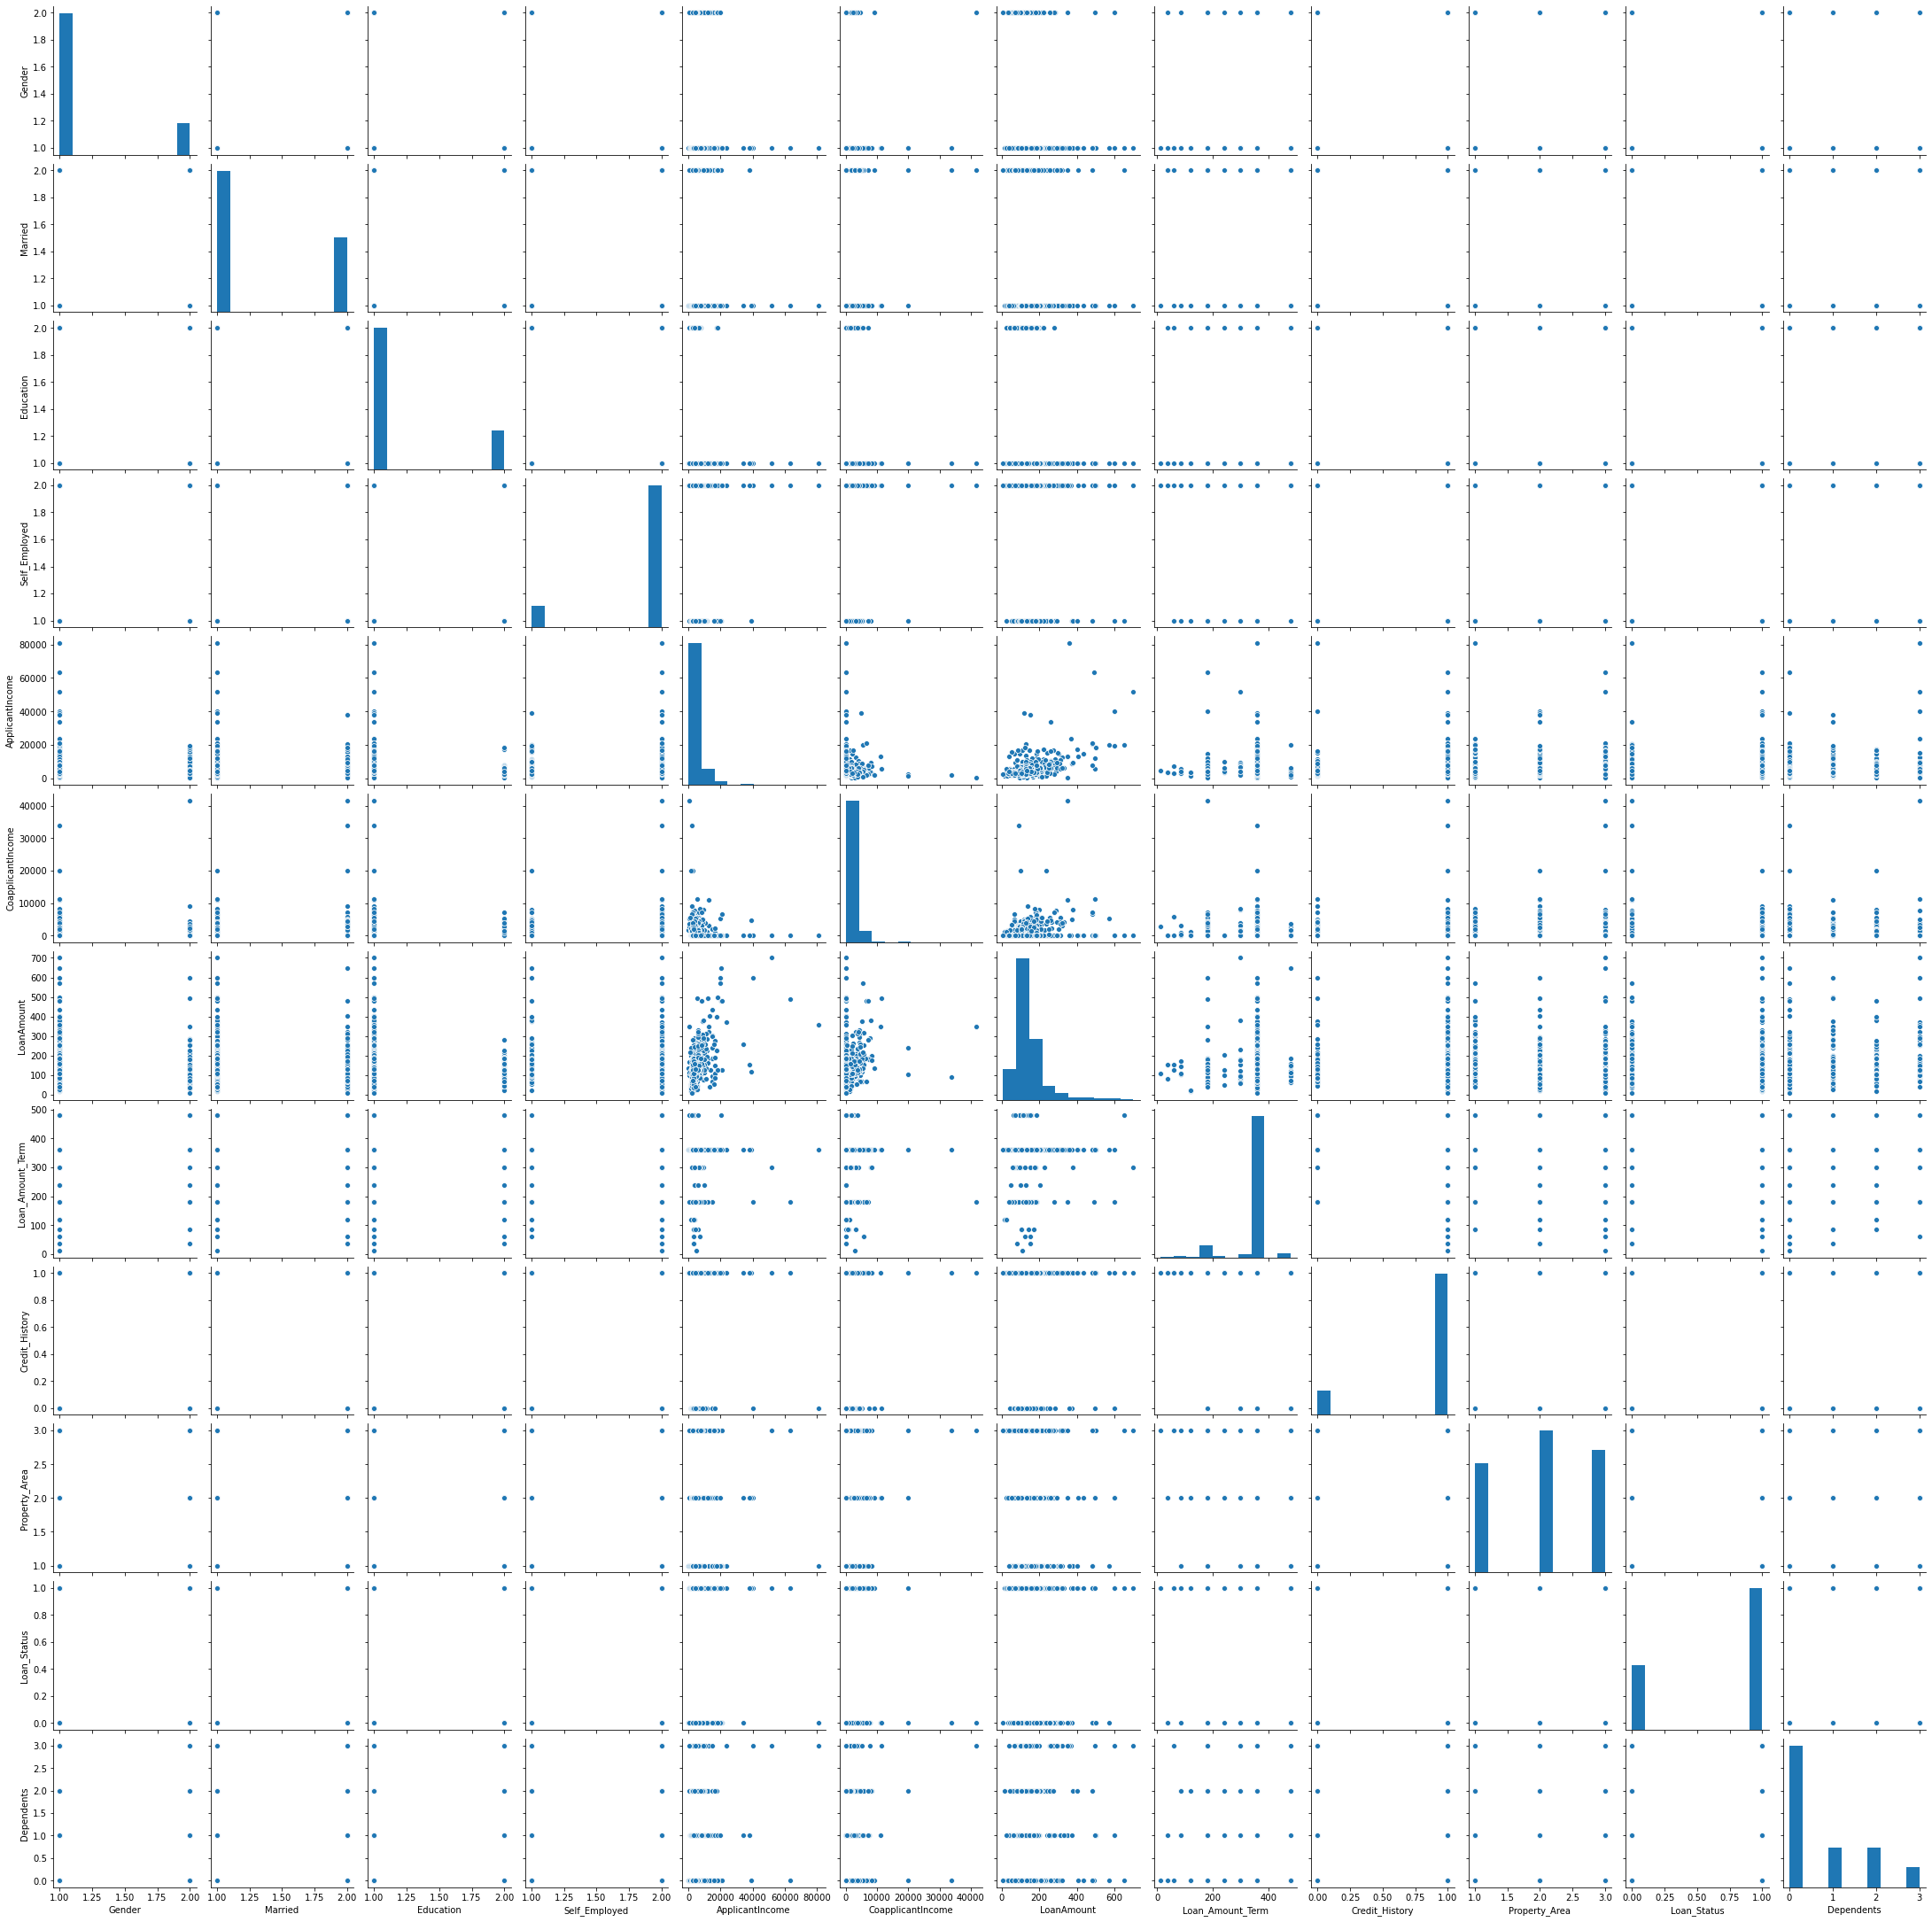

In [26]:
sns.pairplot(df)
plt.show()

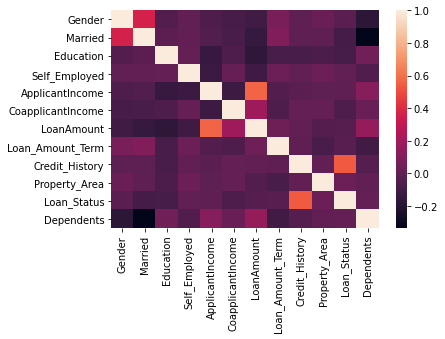

In [27]:
# Correlation Matrix
sns.heatmap(df.corr())

In [28]:
# Check the skewness
df.skew()

Gender               1.648795
Married              0.644850
Education            1.367622
Self_Employed       -2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
Dependents           1.015551
dtype: float64

In [29]:
# Treating skewness
skew = ('Gender','Married','Education','Dependents','ApplicatIncome','CoapplicantIncome','LoanAmount')
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col] = np.log1p(df[col])

In [30]:
# Check the skewness
df.skew()

Gender               1.648795
Married              0.644850
Education            1.367622
Self_Employed       -2.159796
ApplicantIncome      0.482128
CoapplicantIncome   -0.173073
LoanAmount          -0.151578
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
Dependents           0.671985
dtype: float64

In [31]:
# Seperating the input and target variable 
y = df['Loan_Status']
X = df.drop('Loan_Status', axis = 1)

In [32]:
# Scaling the imput variable
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(X)
x = pd.DataFrame(X,columns=X.columns)

In [33]:
# Machine Learning 
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Check the Various Models 

# Logistic Regression

In [34]:
model = LogisticRegression()
model.fit(X_train, y_train)
ypred = model.predict(X_test)
print(ypred)
evaluation = f1_score(y_test, ypred)
evaluation

[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1]


0.8934010152284264

# Decision Tree

In [35]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [36]:
ypred_tree = tree.predict(X_test)
print(ypred_tree)

[0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 1
 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0
 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0
 1 1 1 0 0 1 1 1 0 1 0 0]


In [37]:
evaluation = f1_score(y_test, ypred_tree)
evaluation

0.7719298245614035

 # Random Forest Classifier

In [38]:
forest = RandomForestClassifier()
forest.fit(X_train,y_train)

RandomForestClassifier()

In [39]:
ypred_forest = forest.predict(X_test)
print(ypred_forest)

[1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1]


In [40]:
evaluation_forest = f1_score(y_test,ypred_forest)
evaluation_forest

0.8645833333333334

In [41]:
import joblib
joblib.dump(model,'loan_prediction.pkl')

['loan_prediction.pkl']

# Conclusion 

From the Exploratory Data Analysis, we could generate insight from the data. How each of the features relates to the target. Also, it can be seen from the evaluation of three models that Logistic Regression performed better than others compare to Decision Tree and Random Forest.